<a href="https://colab.research.google.com/github/shraddha-369/2HCL_Titanic_Survival_Predictor/blob/main/HCL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Titanic Survival Prediction using Machine Learning"**



***The Titanic Survival Predictor project demonstrates the use of machine learning to analyze real-world data. Using the Titanic dataset, it identifies how factors like passenger class, age, gender, fare, and family size influenced survival chances. The project applies preprocessing steps such as handling missing values and encoding categorical variables. Models like Logistic Regression and Random Forest are trained to predict survival, with evaluation through accuracy scores, classification reports, and confusion matrices. A live prediction example further highlights practical usage. This project showcases the power of predictive modeling in uncovering patterns from historical events.***

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#Load Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Data Preprocessing
features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch"]
target = "Survived"

df = data[features + [target]]

# Handle missing values
df["Age"].fillna(df["Age"].median(), inplace=True)

# Encode categorical columns
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])   # male=1, female=0


/tmp/ipython-input-2990636898.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2990636898.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2990636898.py:12: SettingWithCopyWarning: 
A value is trying

In [6]:
#Train-Test Split
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
#Model Training (Logistic Regression)
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [8]:
#Prediction & Evaluation
y_pred = log_model.predict(X_test)

In [11]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



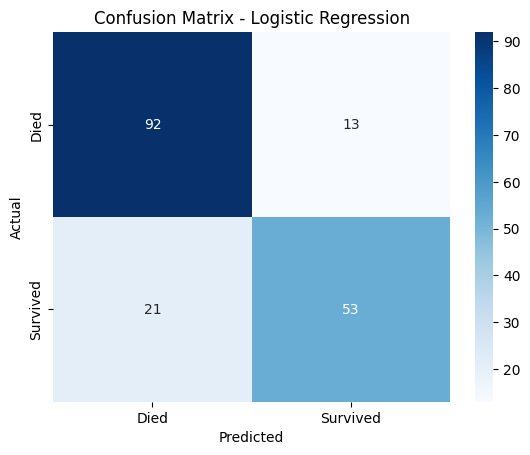

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Died","Survived"], yticklabels=["Died","Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [12]:
#Try Random Forest (Optional for better accuracy)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.7988826815642458


In [13]:
#Live Prediction
new_passenger = np.array([[3, 1, 22, 7.25, 0, 0]])
print("Predicted Outcome (0 = Died, 1 = Survived):", log_model.predict(new_passenger))

Predicted Outcome (0 = Died, 1 = Survived): [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
